In [1]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GRU, Dense

# # Load the dataset
# file_path = '/content/Kosi Rainfall + metrics daily (2014-2023).csv'
# data = pd.read_csv(file_path)

# # Display the first few rows of the dataset
# print(data.head())

# # Preprocess the data
# # Drop LAT and LON as they are constant
# data = data.drop(columns=['LAT', 'LON'])

# # Normalize the data
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data)

# # Convert to a DataFrame
# data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# # Create sequences
# def create_sequences(data, seq_length):
#     xs, ys = [], []
#     for i in range(len(data) - seq_length):
#         x = data.iloc[i:i+seq_length].values
#         y = data.iloc[i+seq_length].values
#         xs.append(x)
#         ys.append(y)
#     return np.array(xs), np.array(ys)

# SEQ_LENGTH = 30  # 30 days sequence
# X, y = create_sequences(data_scaled, SEQ_LENGTH)

# # Split into train and test sets
# split = int(0.8 * len(X))
# X_train, X_test = X[:split], X[split:]
# y_train, y_test = y[:split], y[split:]

# # Build the GRU model
# model = Sequential()
# model.add(GRU(50, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])))
# model.add(GRU(50))
# model.add(Dense(X_train.shape[2]))

# model.compile(optimizer='adam', loss='mse')
# model.summary()









# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

# Load the dataset
file_path = '/content/Kosi Rainfall + metrics daily (2014-2023).csv'
data = pd.read_csv(file_path)

# Preprocess the data
data = data.drop(columns=['LAT', 'LON'])

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:i+seq_length].values
        y = data.iloc[i+seq_length].values
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

SEQ_LENGTH = 30  # 30 days sequence
X, y = create_sequences(data_scaled, SEQ_LENGTH)

# Split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the GRU model
model = Sequential()
model.add(GRU(100, return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(100))
model.add(Dropout(0.2))
model.add(Dense(X_train.shape[2]))

model.compile(optimizer='adam', loss='mse')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 30, 100)           33300     
                                                                 
 dropout (Dropout)           (None, 30, 100)           0         
                                                                 
 gru_1 (GRU)                 (None, 100)               60600     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 9)                 909       
                                                                 
Total params: 94809 (370.35 KB)
Trainable params: 94809 (370.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# # Train the model
# history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)



# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)



Epoch 1/50
73/73 [==============================] - 3s 47ms/step - loss: 0.0099 - val_loss: 0.0097
Epoch 2/50
73/73 [==============================] - 5s 67ms/step - loss: 0.0097 - val_loss: 0.0084
Epoch 3/50
73/73 [==============================] - 3s 47ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 4/50
73/73 [==============================] - 3s 47ms/step - loss: 0.0096 - val_loss: 0.0085
Epoch 5/50
73/73 [==============================] - 5s 62ms/step - loss: 0.0093 - val_loss: 0.0083
Epoch 6/50
73/73 [==============================] - 4s 51ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 7/50
73/73 [==============================] - 3s 47ms/step - loss: 0.0090 - val_loss: 0.0083
Epoch 8/50
73/73 [==============================] - 3s 47ms/step - loss: 0.0088 - val_loss: 0.0082
Epoch 9/50
73/73 [==============================] - 5s 67ms/step - loss: 0.0088 - val_loss: 0.0076
Epoch 10/50
73/73 [==============================] - 3s 47ms/step - loss: 0.0088 - val_loss: 0.0078
Epoch 11/

In [5]:
# # Predict on test data
# y_pred = model.predict(X_test)

# # Inverse transform the predictions and actual values
# y_test_inv = scaler.inverse_transform(y_test)
# y_pred_inv = scaler.inverse_transform(y_pred)

# # Calculate evaluation metrics for each parameter
# parameters = data.columns

# for i, param in enumerate(parameters):
#     mse = mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i])
#     mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
#     rmse = np.sqrt(mse)
#     r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])
#     print(f'{param} - MSE: {mse}')
#     print(f'{param} - MAE: {mae}')
#     print(f'{param} - RMSE: {rmse}')
#     print(f'{param} - R-squared: {r2}')
#     print()









# Predict on test data
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Calculate evaluation metrics for each parameter
parameters = data.columns

for i, param in enumerate(parameters):
    mse = mean_squared_error(y_test_inv[:, i], y_pred_inv[:, i])
    mae = mean_absolute_error(y_test_inv[:, i], y_pred_inv[:, i])
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_inv[:, i], y_pred_inv[:, i])
    print(f'{param} - MSE: {mse}')
    print(f'{param} - MAE: {mae}')
    print(f'{param} - RMSE: {rmse}')
    print(f'{param} - R-squared: {r2}')
    print()





23/23 [==============================] - 0s 14ms/step
YEAR - MSE: 0.03993228462235681
YEAR - MAE: 0.1724048693426724
YEAR - RMSE: 0.19983063984873994
YEAR - R-squared: 0.8402632640439399

MO - MSE: 0.1989967443351968
MO - MAE: 0.2343539236331807
MO - RMSE: 0.44609051137095124
MO - R-squared: 0.983075069126588

DY - MSE: 12.883064155539287
DY - MAE: 1.6524032362576189
DY - RMSE: 3.5892985603790732
DY - R-squared: 0.8321865190955308

PRECTOTCORR - MSE: 42.212057602763146
PRECTOTCORR - MAE: 2.990249078479602
PRECTOTCORR - RMSE: 6.4970806984955285
PRECTOTCORR - R-squared: 0.3846653095653688

WS10M - MSE: 0.8893762178436351
WS10M - MAE: 0.7203018630718364
WS10M - RMSE: 0.9430674513753696
WS10M - R-squared: 0.47353828918167784

RH2M - MSE: 29.000046790080507
RH2M - MAE: 4.0573300151956495
RH2M - RMSE: 5.385169151482663
RH2M - R-squared: 0.9278263393976153

QV2M - MSE: 1.2923948478951865
QV2M - MAE: 0.8395273302407101
QV2M - RMSE: 1.13683545330676
QV2M - R-squared: 0.9637906563197627

T2M_RAN

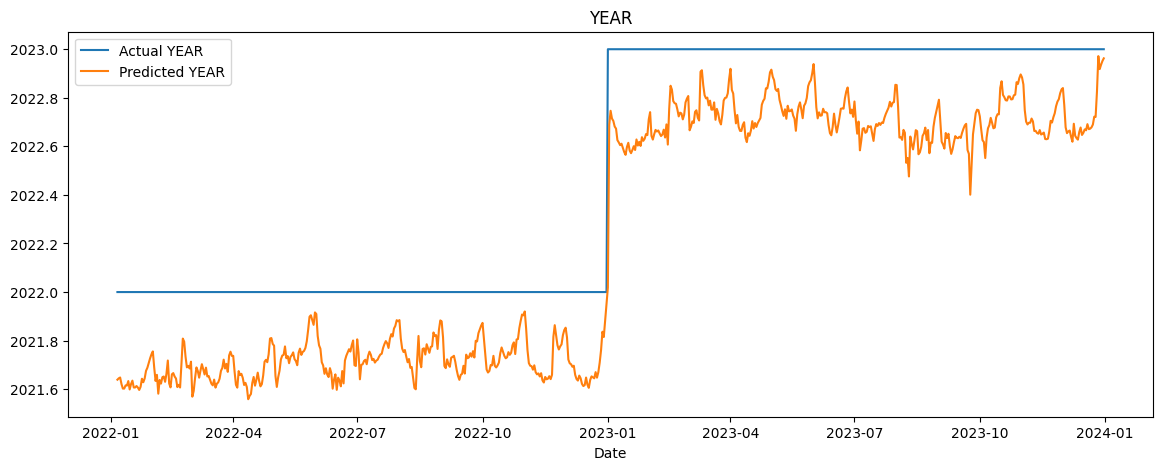

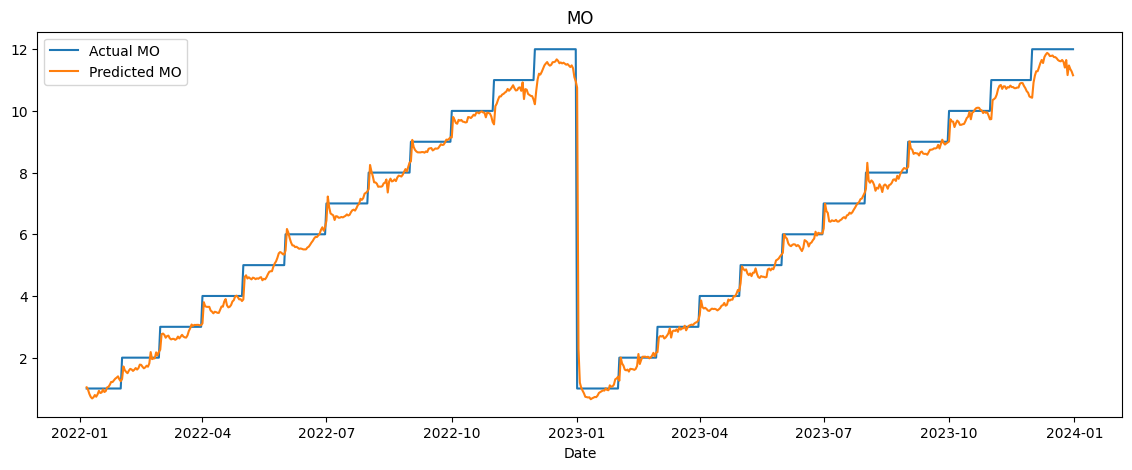

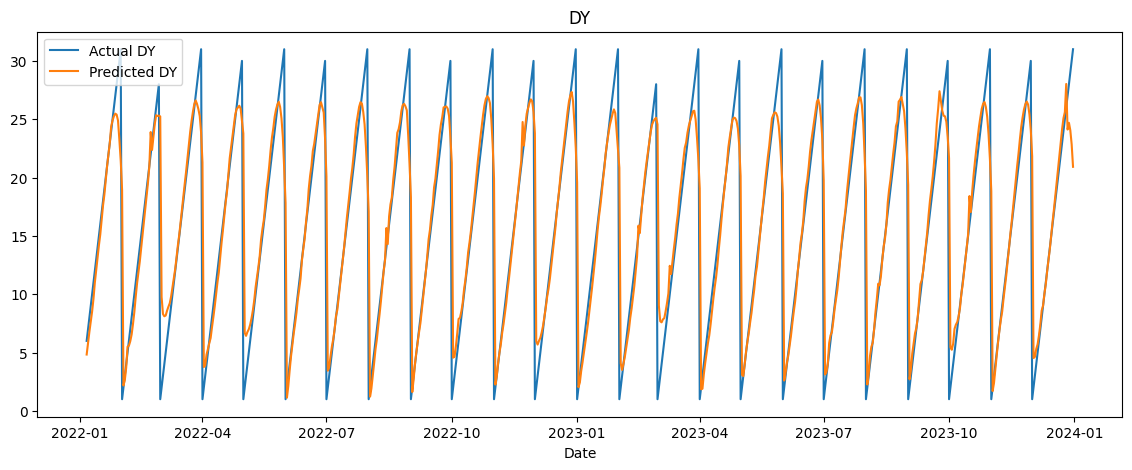

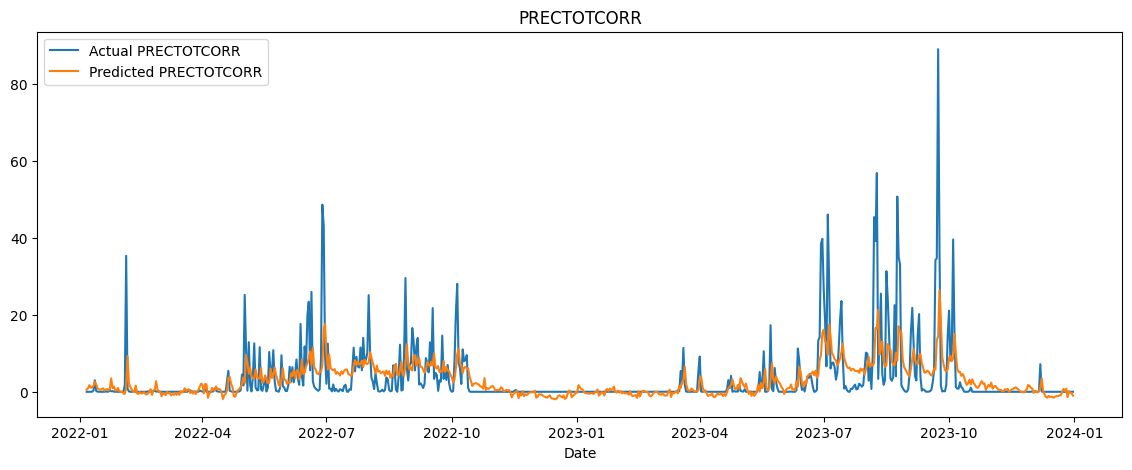

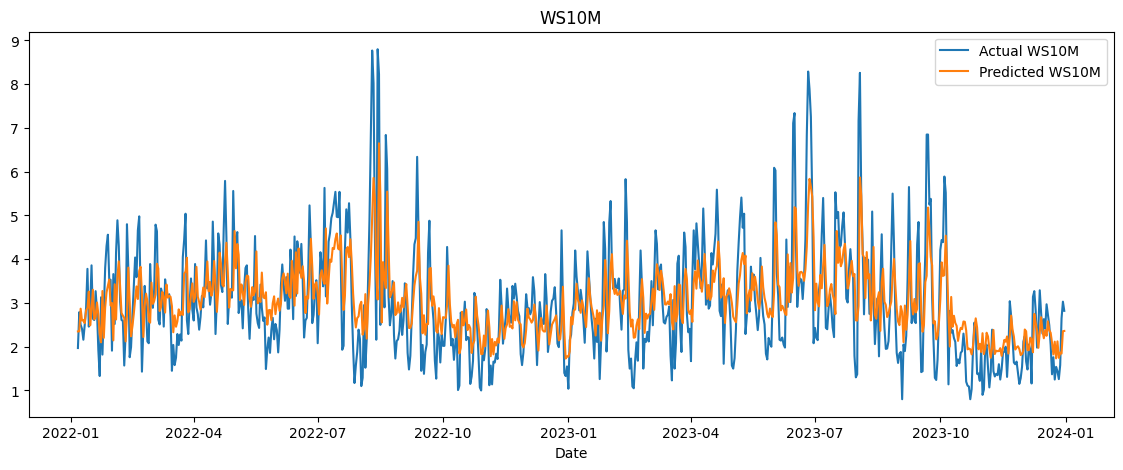

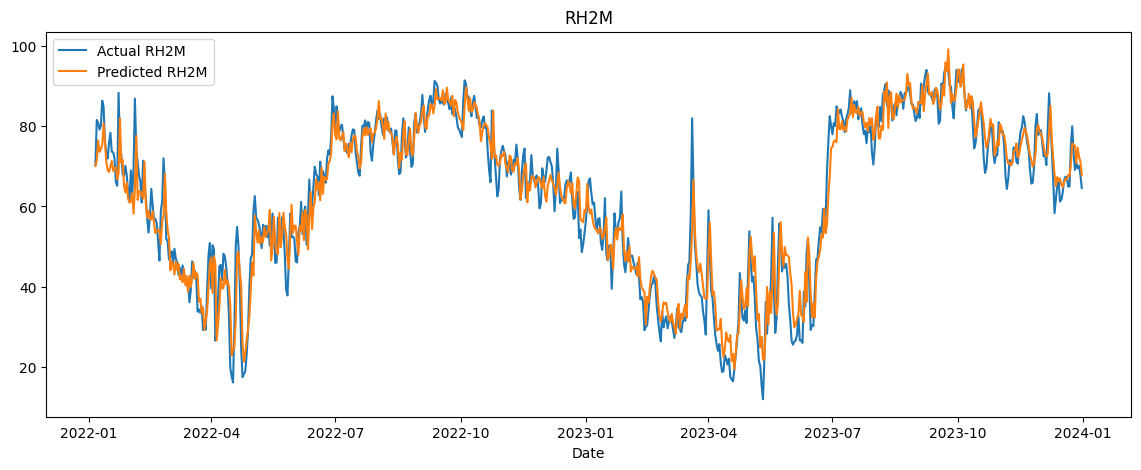

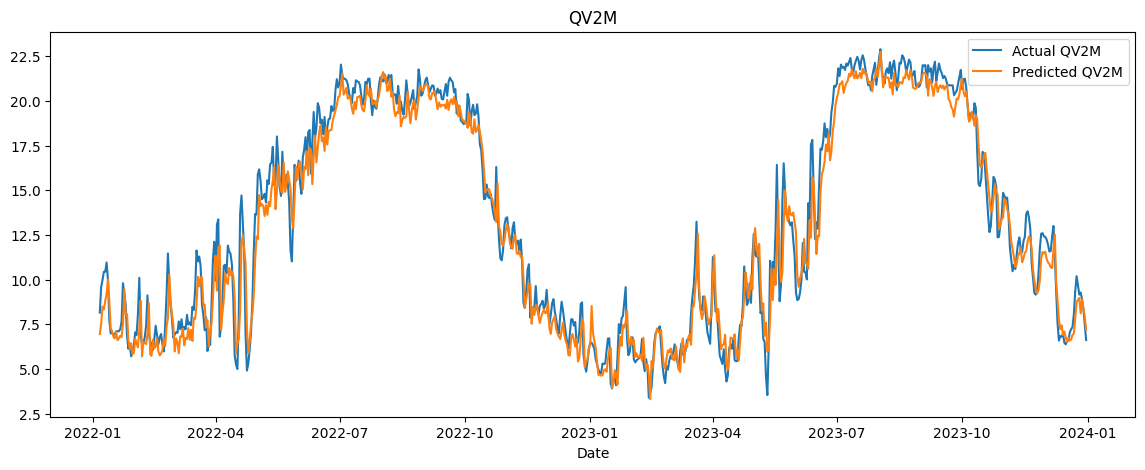

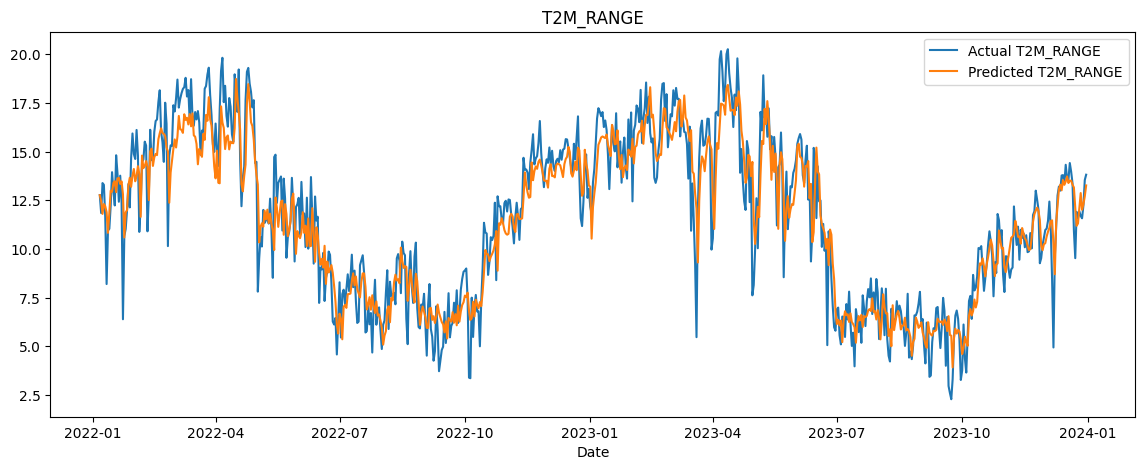

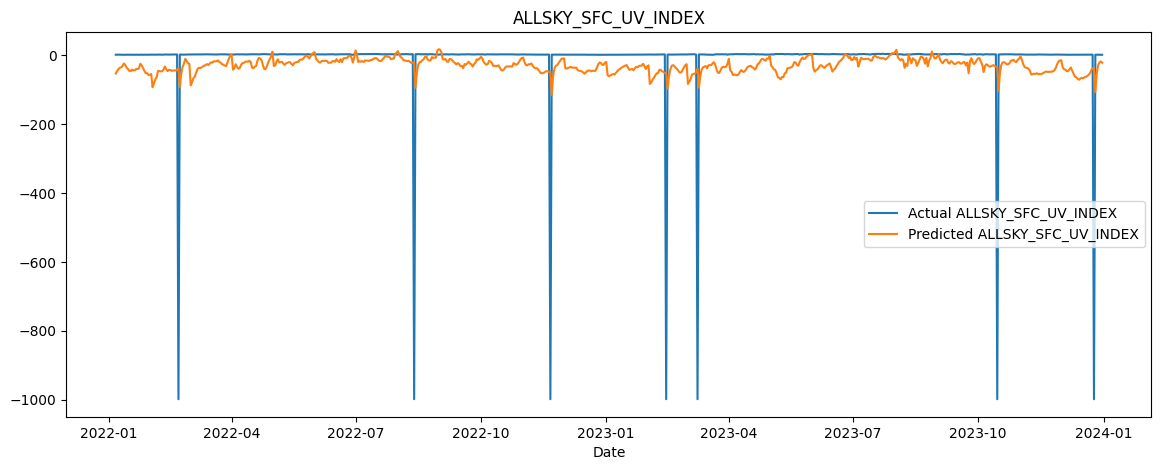

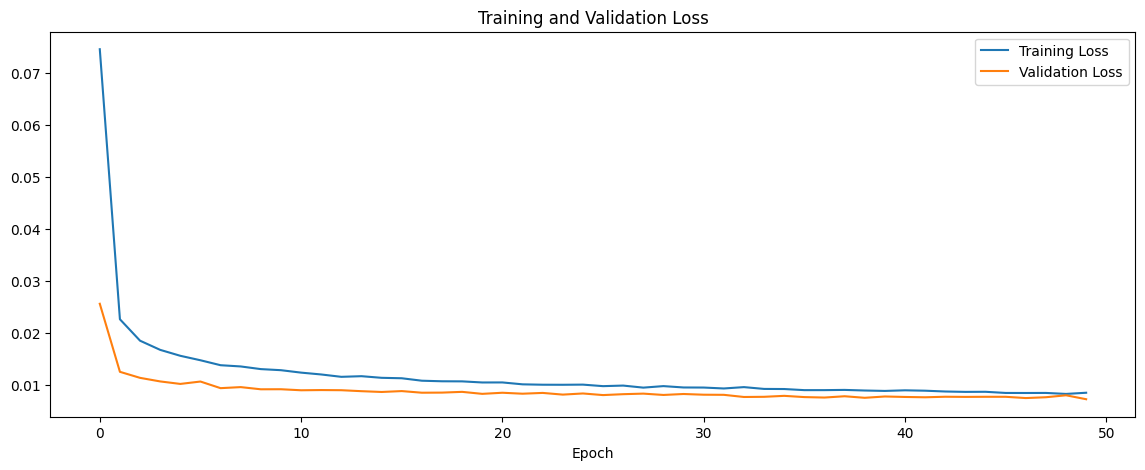

In [ ]:
# # Create a datetime column in the original data
# data['DATE'] = pd.to_datetime(data[['YEAR', 'MO', 'DY']].rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day'}))

# # Create the datetime series for the test set
# dates = data['DATE'][-len(y_test):].reset_index(drop=True)

# # Plot actual vs predicted values for each parameter separately with dates
# for i, param in enumerate(parameters):
#     plt.figure(figsize=(14, 7))
#     plt.plot(dates, y_test_inv[:, i], label=f'Actual {param}')
#     plt.plot(dates, y_pred_inv[:, i], label=f'Predicted {param}')
#     plt.legend()
#     plt.xlabel('Date')
#     plt.title(param)
#     plt.show()

# # Plot training and validation loss
# plt.figure(figsize=(14, 5))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.legend()
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.show()









# Create a datetime column in the original data
data['DATE'] = pd.to_datetime(data[['YEAR', 'MO', 'DY']].rename(columns={'YEAR': 'year', 'MO': 'month', 'DY': 'day'}))

# Create the datetime series for the test set
dates = data['DATE'][-len(y_test):].reset_index(drop=True)

# Plot actual vs predicted values for each parameter separately with dates
for i, param in enumerate(parameters):
    plt.figure(figsize=(14, 5))
    plt.plot(dates, y_test_inv[:, i], label=f'Actual {param}')
    plt.plot(dates, y_pred_inv[:, i], label=f'Predicted {param}')
    plt.legend()
    plt.xlabel('Date')
    plt.title(param)
    plt.show()

# Plot training and validation loss
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()
